# Library Tools and Packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# General Analysis

In [2]:
data = pd.read_csv("riceClassification.csv")
data

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [3]:
data.shape

(18185, 12)

In [4]:
data.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [5]:
data.tail()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0
18184,18185,6134,153.081981,51.590606,0.941500,6283,88.374495,0.489975,338.613,0.672274,2.967245,0


In [6]:
data.isna().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [9]:
data_one = data.copy
data = data.drop(labels='id',axis=1)

In [10]:
data.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [11]:
data.dtypes

Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Perimeter          float64
Roundness          float64
AspectRation       float64
Class                int64
dtype: object

In [12]:
data['Class'].value_counts()

Class
1    9985
0    8200
Name: count, dtype: int64

# Data Splitting

In [13]:
Y  = data['Class']
X = data.drop('Class',axis=1)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [15]:
X_train.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
723,5435,134.395407,52.681930,0.919969,5607,83.186880,0.524969,311.995,0.701640,2.551072
1274,5950,142.574525,53.696529,0.926368,6043,87.038930,0.549096,321.265,0.724436,2.655191
10672,5878,162.359964,47.186511,0.956836,6083,86.510705,0.418780,358.343,0.575230,3.440813
1954,5786,143.581125,52.658820,0.930318,5943,85.831020,0.809231,327.978,0.675926,2.726630
3239,5515,141.829041,50.283875,0.935041,5616,83.796874,0.490877,317.680,0.686714,2.820567


In [16]:
train_set = pd.concat([X_train,Y_train],axis=1)
train_set

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
723,5435,134.395407,52.681930,0.919969,5607,83.186880,0.524969,311.995,0.701640,2.551072,1
1274,5950,142.574525,53.696529,0.926368,6043,87.038930,0.549096,321.265,0.724436,2.655191,1
10672,5878,162.359964,47.186511,0.956836,6083,86.510705,0.418780,358.343,0.575230,3.440813,1
1954,5786,143.581125,52.658820,0.930318,5943,85.831020,0.809231,327.978,0.675926,2.726630,1
3239,5515,141.829041,50.283875,0.935041,5616,83.796874,0.490877,317.680,0.686714,2.820567,1
...,...,...,...,...,...,...,...,...,...,...,...
9372,6532,166.236132,51.421649,0.950955,6720,91.196495,0.551224,369.082,0.602574,3.232804,1
7291,6377,159.218398,51.986057,0.945194,6565,90.107983,0.616970,354.079,0.639184,3.062713,1
17728,10131,176.412300,73.691878,0.908573,10402,113.574600,0.612774,416.495,0.733910,2.393918,0
7293,5607,148.440743,48.463357,0.945203,5722,84.492924,0.460799,329.340,0.649608,3.062948,1


In [17]:
test_set = pd.concat([X_test,Y_test],axis=1)
test_set

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
777,6512,147.534740,57.464027,0.921029,6685,91.056773,0.805442,338.754,0.713108,2.567428,1
2038,6314,149.633460,54.744096,0.930672,6466,89.661778,0.799544,338.588,0.692104,2.733326,1
7009,6784,164.349722,53.949120,0.944588,7025,92.938997,0.561171,368.908,0.626411,3.046384,1
15967,9163,164.132165,72.350887,0.897601,9486,108.012471,0.648478,392.486,0.747479,2.268558,0
7870,5199,144.901586,46.700824,0.946640,5369,81.360755,0.501108,320.181,0.637292,3.102763,1
...,...,...,...,...,...,...,...,...,...,...,...
11204,8489,151.655045,72.418507,0.878620,8728,103.964083,0.589678,375.653,0.755949,2.094148,0
8942,6260,161.376137,50.609601,0.949551,6556,89.277542,0.462470,362.129,0.599871,3.188647,1
13572,7420,145.041079,66.336343,0.889280,7713,97.197929,0.606209,353.088,0.747907,2.186450,0
16575,9283,165.756310,72.162465,0.900260,9510,108.717444,0.639854,398.483,0.734647,2.296988,0


# Outlier Analysis 

## DB-SCAN 


In [18]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [19]:
X_train_copy = X_train.copy()
X = StandardScaler().fit_transform(X_train_copy.values)

db = DBSCAN(eps=3.0, min_samples=10).fit(X)
labels = db.labels_

In [20]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('The number of clusters in dataset is:', n_clusters_)

The number of clusters in dataset is: 1


In [21]:
pd.Series(labels).value_counts()

 0    14542
-1        6
Name: count, dtype: int64

In [22]:
outlier_count = (labels == -1).sum()
total_points = len(labels)
outlier_percentage = (outlier_count / total_points) * 100
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

Percentage of outliers: 0.04%


#  Mahalanobis Distance

In [23]:
import numpy as np
import pandas as pd
from scipy.stats import chi2

def mahalanobis_distances(X):
    mean = np.mean(X, axis=0)
    cov_matrix = np.cov(X.T)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    diffs = X - mean
    distances = np.sqrt(np.diag(diffs.dot(inv_cov_matrix).dot(diffs.T)))
    return distances

distances = mahalanobis_distances(X_train_copy.values)


threshold = chi2.ppf(0.975, X_train_copy.shape[1])  # 97.5% quantile with degrees of freedom = number of variables

outliers = distances > threshold

outlier_count = np.sum(outliers)
total_count = len(X_train_copy)
outlier_percentage = (outlier_count / total_count) * 100

print(f"Threshold for outliers: {threshold:.2f}")
print(f"Number of outliers: {outlier_count}")
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

outlier_data = X_train_copy[outliers]
outlier_data

Threshold for outliers: 20.48
Number of outliers: 12
Percentage of outliers: 0.08%


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
172,3320,104.957985,50.875027,0.874670,4375,65.016577,0.409927,488.837,0.174590,2.063055
295,4179,118.582300,52.066166,0.898452,5019,72.944281,0.418947,448.305,0.261297,2.277531
18065,6303,143.550166,57.109851,0.917455,6963,89.583642,0.616491,459.759,0.374711,2.513580
8,2629,74.133114,48.074144,0.761228,2790,57.856260,0.640595,207.325,0.768594,1.542058
326,4491,123.037093,52.897323,0.902862,5426,75.618244,0.535983,434.235,0.299298,2.325961
17553,6908,152.113528,64.189376,0.906604,7821,93.784534,0.528700,476.522,0.382293,2.369762
2407,5476,142.169713,51.489479,0.932112,6178,83.500058,0.517287,508.511,0.266117,2.761141
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137
11166,4434,150.442219,41.478578,0.961241,5661,75.136836,0.421964,421.126,0.314182,3.626986
10896,4620,153.288068,43.598410,0.958699,5603,76.696589,0.500325,442.959,0.295886,3.515910


# Overview Visualizations


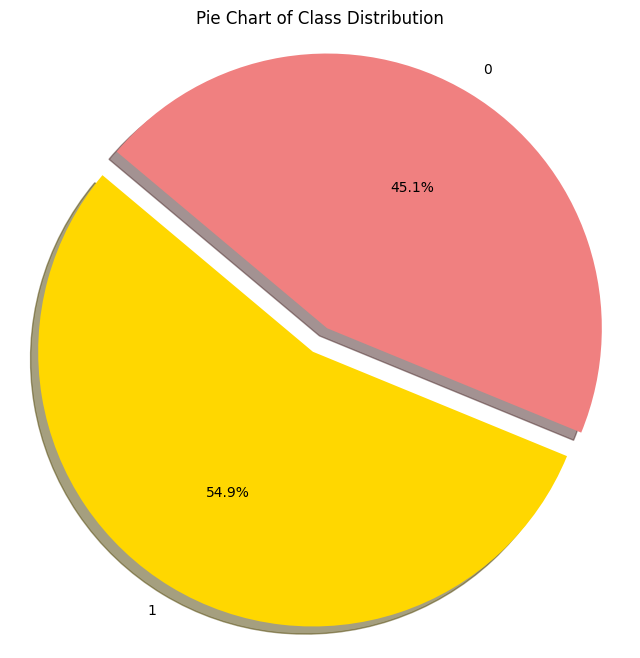

In [24]:
class_counts = data['Class'].value_counts()
labels = class_counts.index
sizes = class_counts.values
colors = ['gold', 'lightcoral']  
explode = (0.1, 0)  

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Title and display
plt.title('Pie Chart of Class Distribution')
plt.axis('equal') 
plt.show()

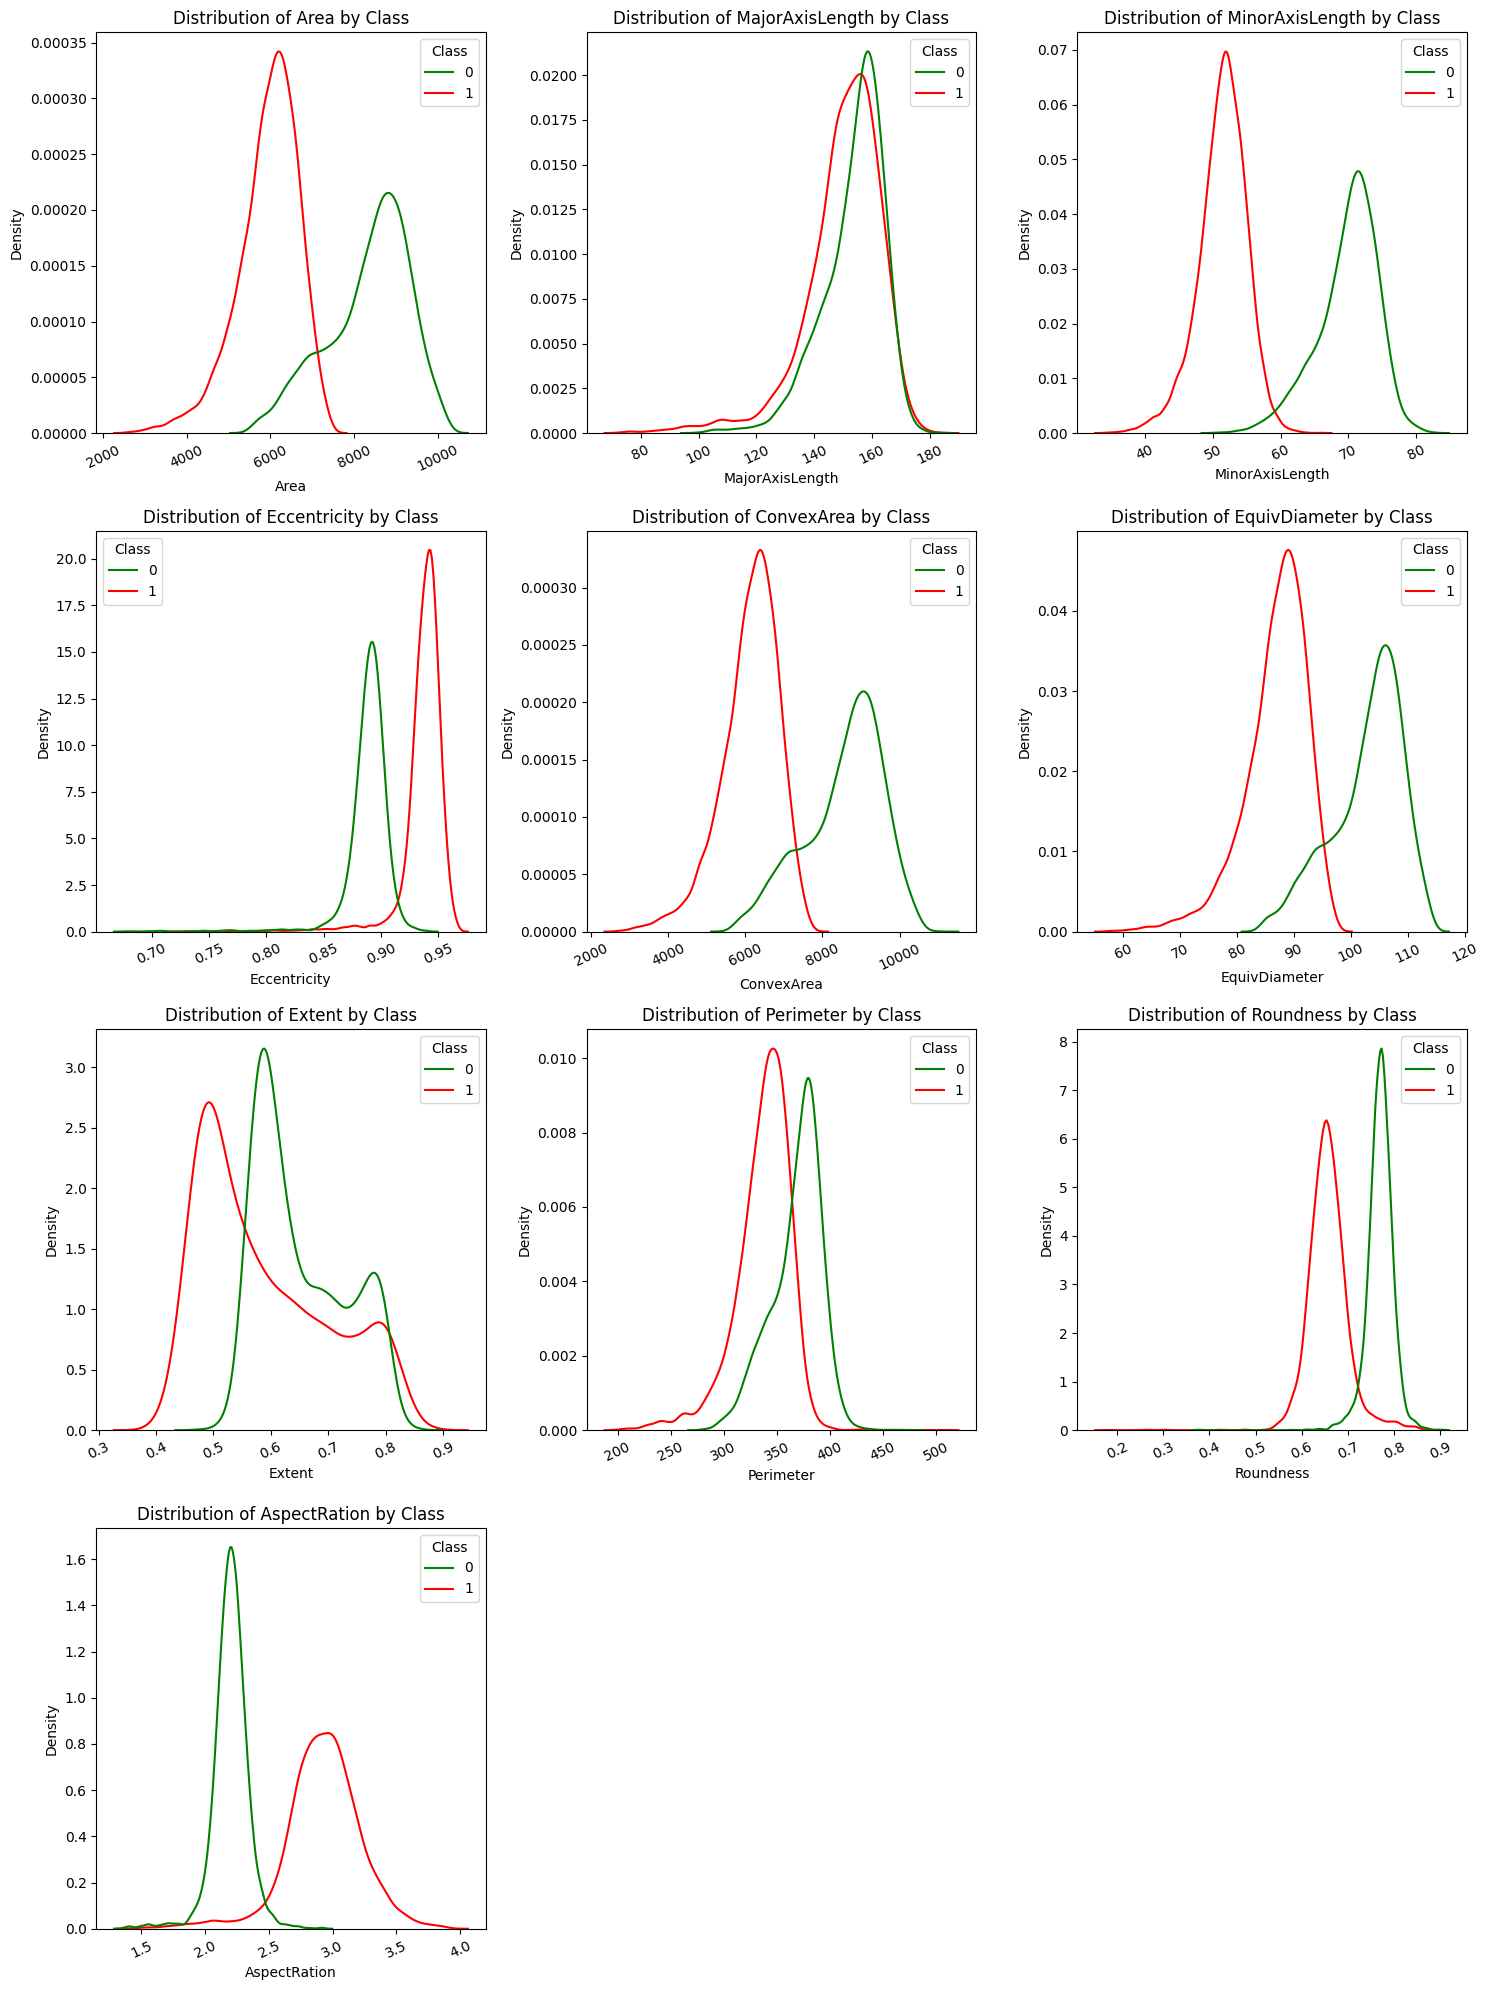

In [25]:
num_cols = X_train_copy.shape[1]
num_rows = int(np.ceil(num_cols / 3))

fig, ax = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
ax = ax.flatten()

palette = {0: 'green', 1: 'red'}

for i, col in enumerate(X_train_copy.columns):
    sns.kdeplot(data=X_train_copy, x=col, hue=Y_train, palette=palette, ax=ax[i])
    ax[i].set_title(f"Distribution of {col} by Class")  
    ax[i].tick_params(axis='x', rotation=25)

for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

In [26]:
from bluecast.eda.analyse import (
    plot_pie_chart,
    plot_count_pairs,
    bi_variate_plots,
    correlation_heatmap,
    correlation_to_target,
    plot_pca,
    plot_pca_cumulative_variance,
    plot_theil_u_heatmap,
    plot_tsne,
    univariate_plots,
    check_unique_values,
    plot_null_percentage,
    mutual_info_to_target )

In [27]:
from bluecast.preprocessing.feature_types import FeatureTypeDetector

In [28]:
ignore_cols = []

f_type_detector = FeatureTypeDetector()
data = f_type_detector.fit_transform_feature_types(train_set.drop(ignore_cols, axis=1))

print("num_data", len(f_type_detector.num_columns))
print("cat_data", len(f_type_detector.cat_columns))

num_data 11
cat_data 0


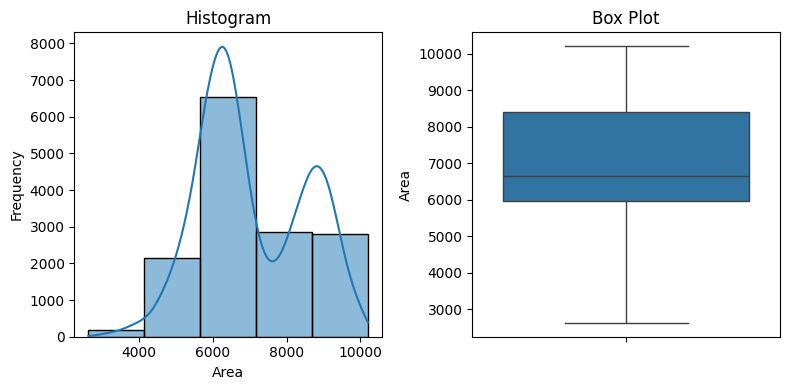

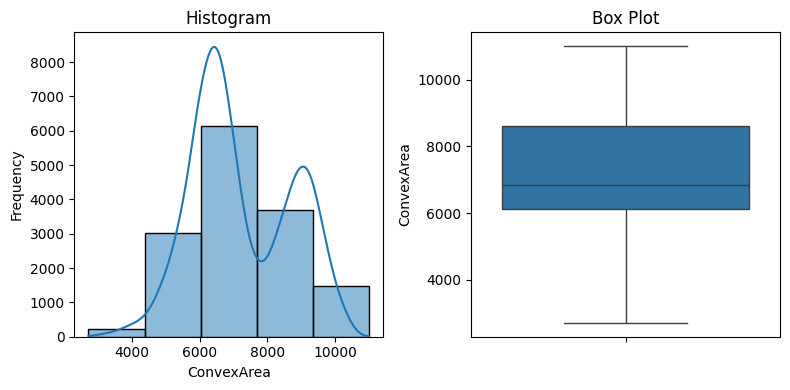

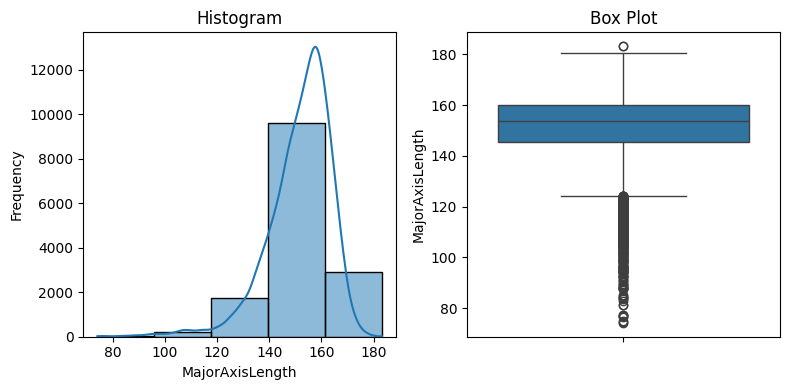

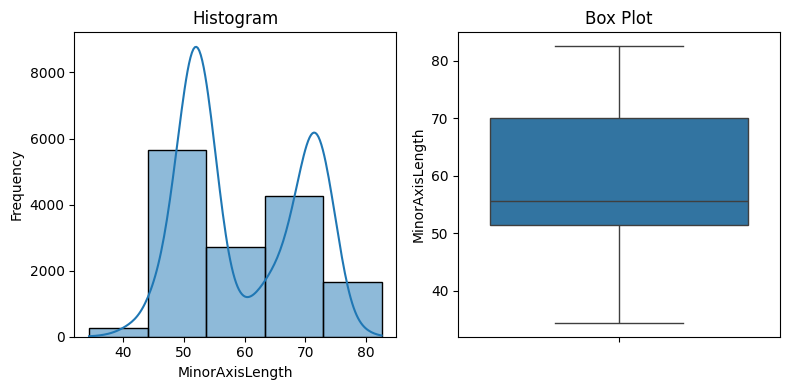

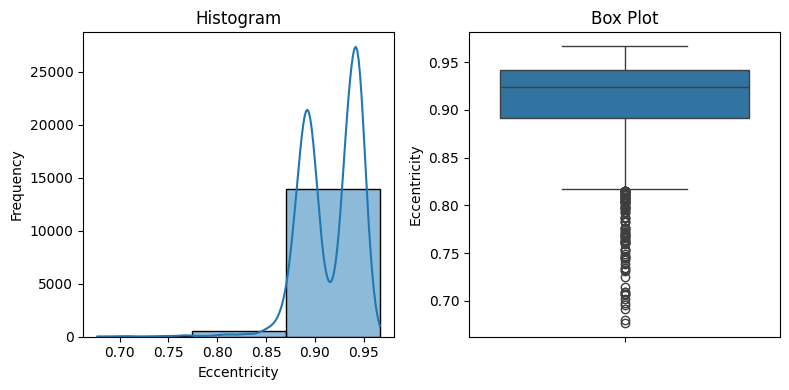

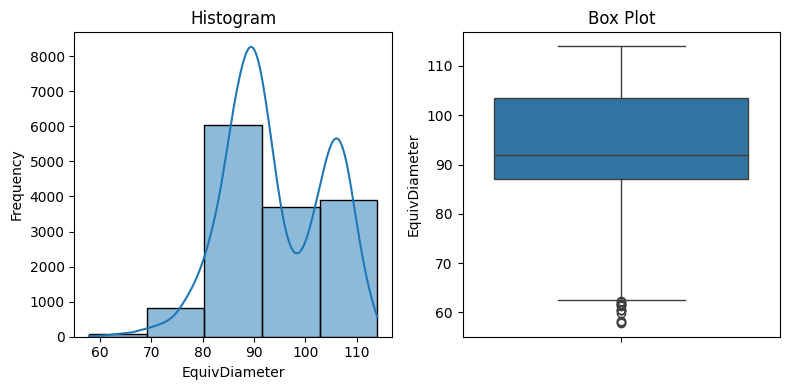

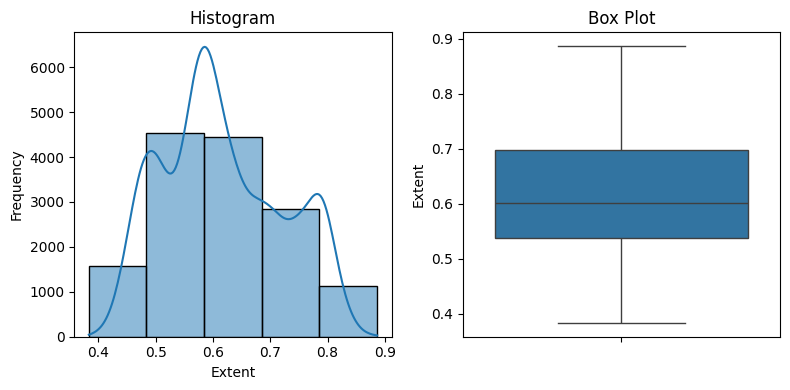

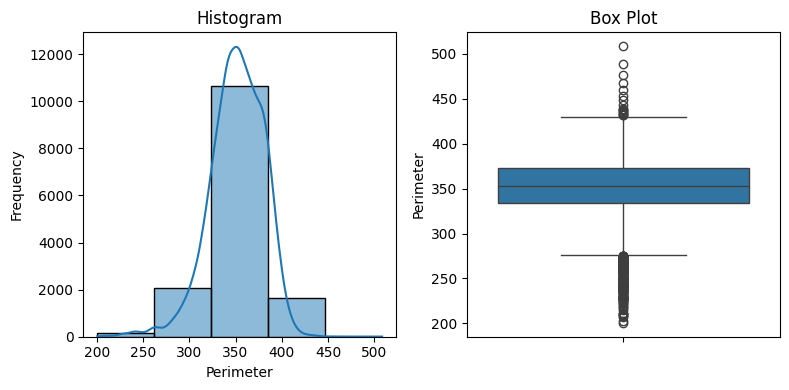

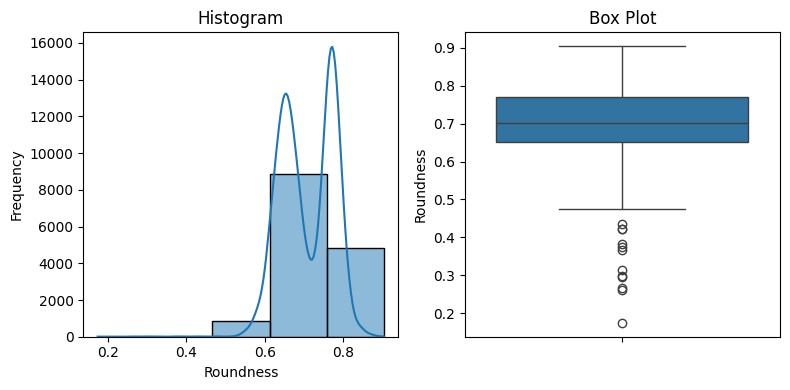

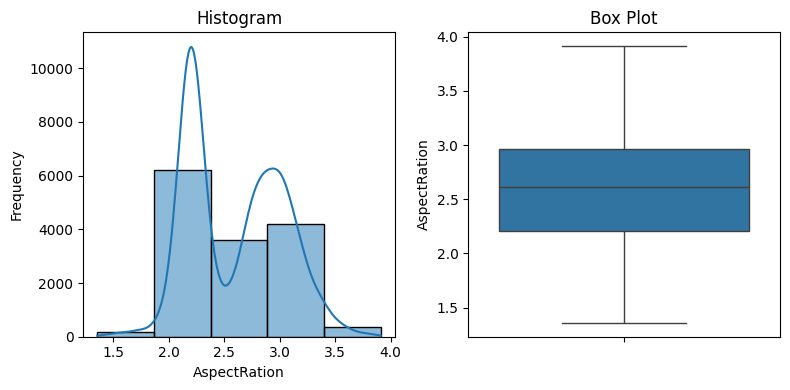

In [29]:
univariate_plots(
        data.loc[:, f_type_detector.num_columns]
    )

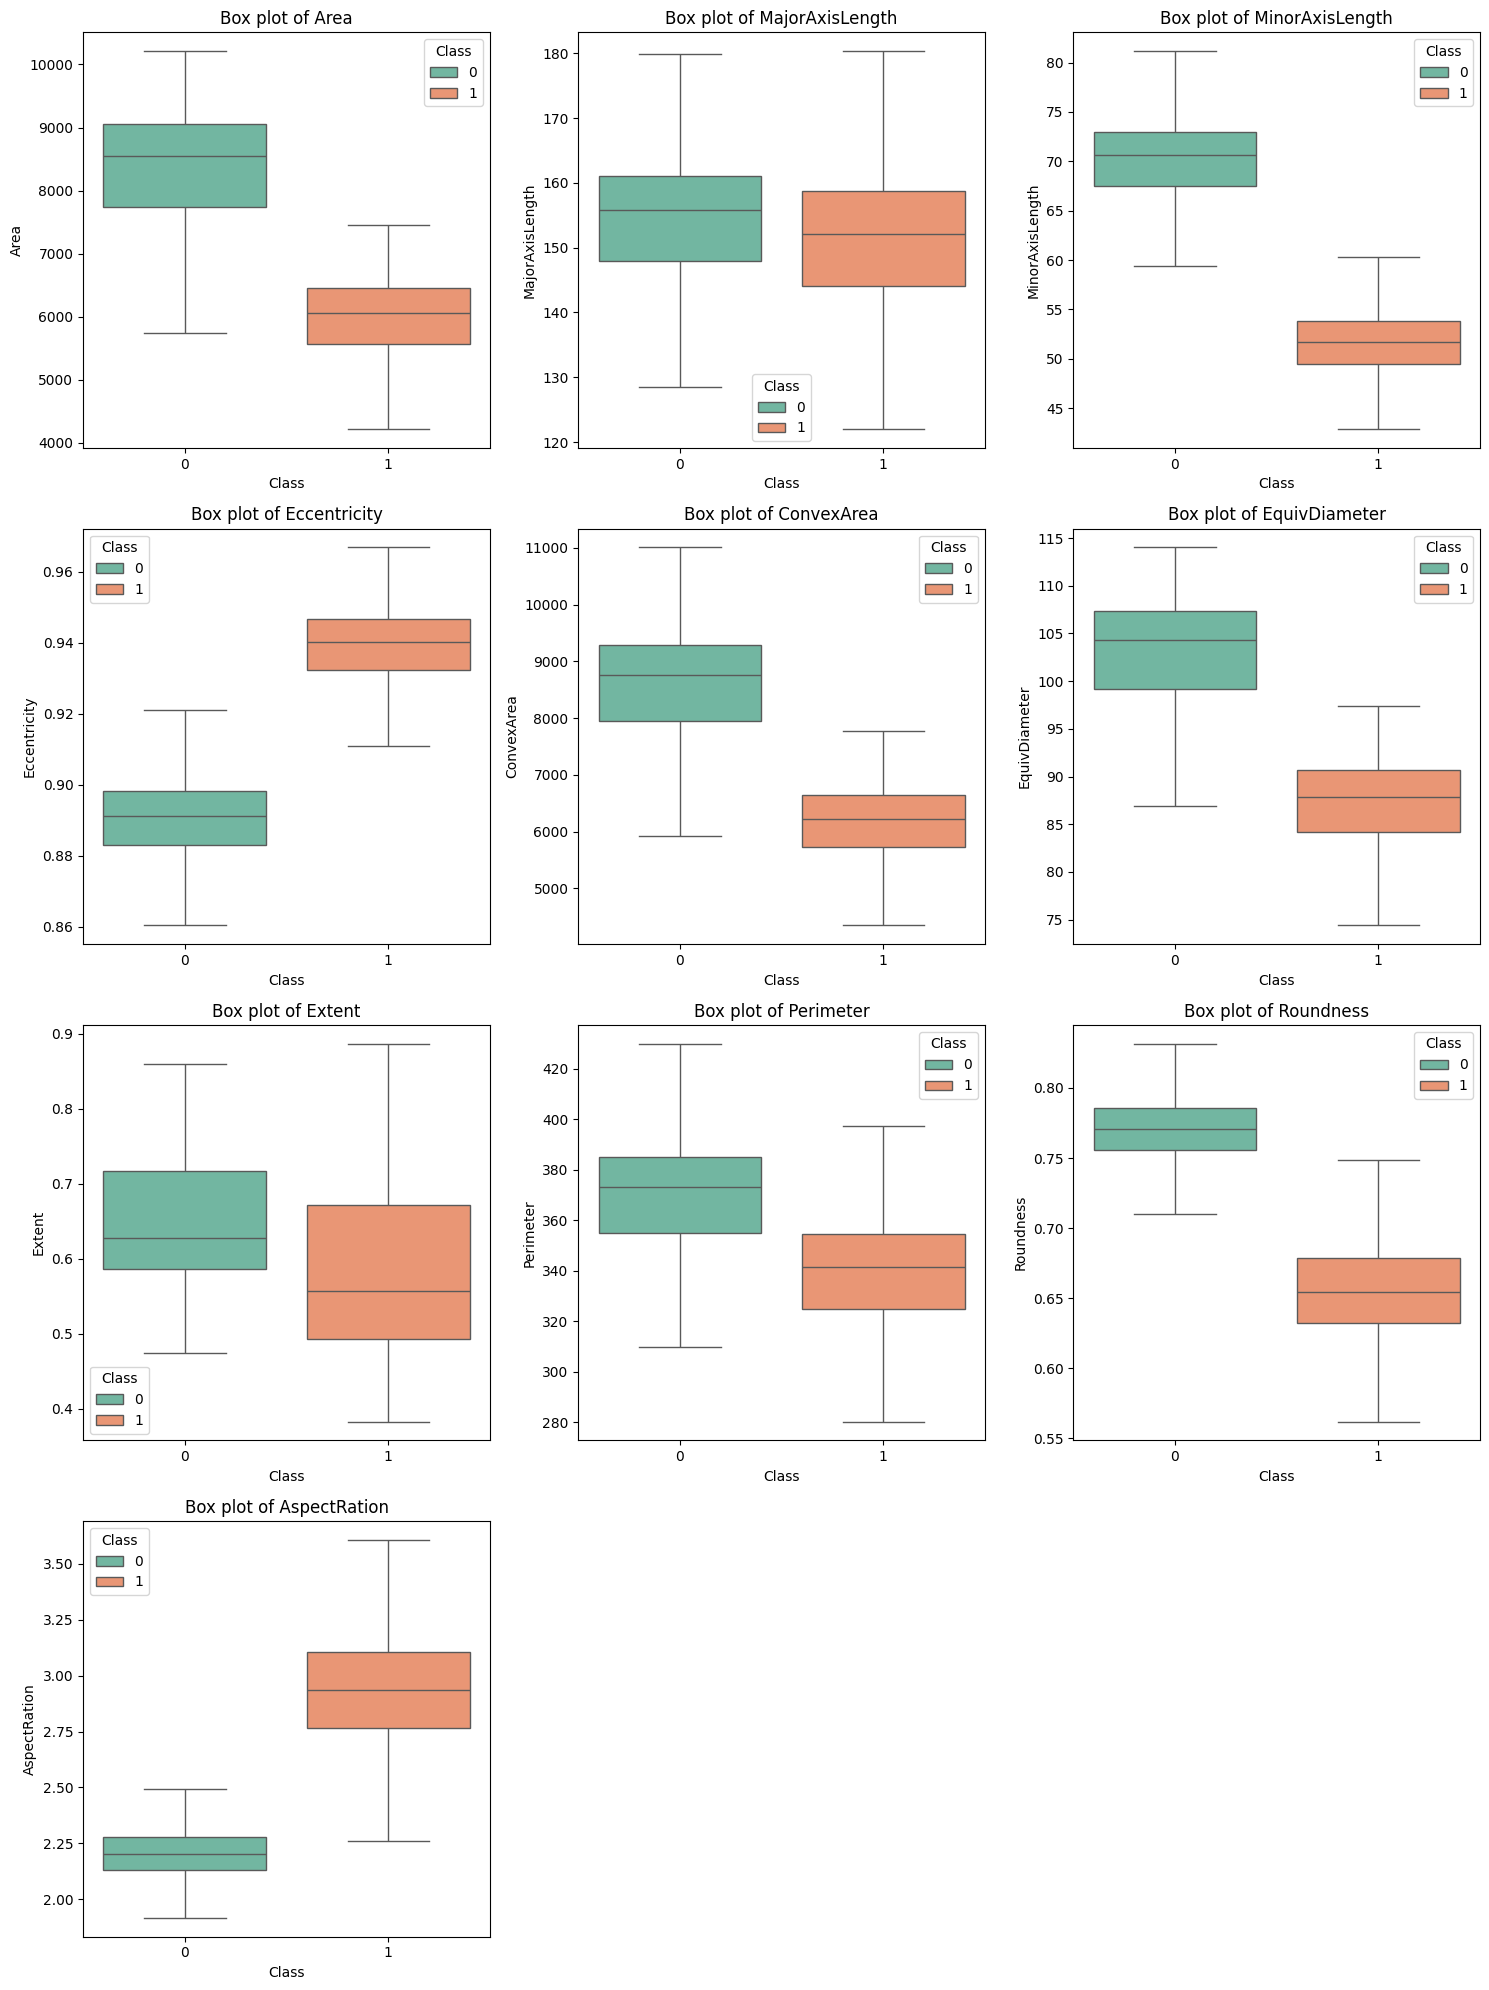

In [30]:
num_cols = X_train.shape[1]
num_rows = int(np.ceil(num_cols / 3))

fig, ax = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
ax = ax.flatten()

hue_order = [0,1]


for idx, col in enumerate(X_train.columns):
    sns.boxplot(
        ax=ax[idx], 
        x=train_set['Class'], 
        y=train_set[col], 
        hue=train_set['Class'], 
        hue_order=hue_order, 
        palette="Set2",
        showfliers=False  # This hides the outliers in the box plot
    )
    ax[idx].set_title(f'Box plot of {col}')
    ax[idx].legend(title='Class')
    
# Remove unused subplots if any
for i in range(len(X_train.columns), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

# DTALE

In [31]:
#import dtale

In [32]:
#dtale.show(train_set)

# Correlation Analysis 

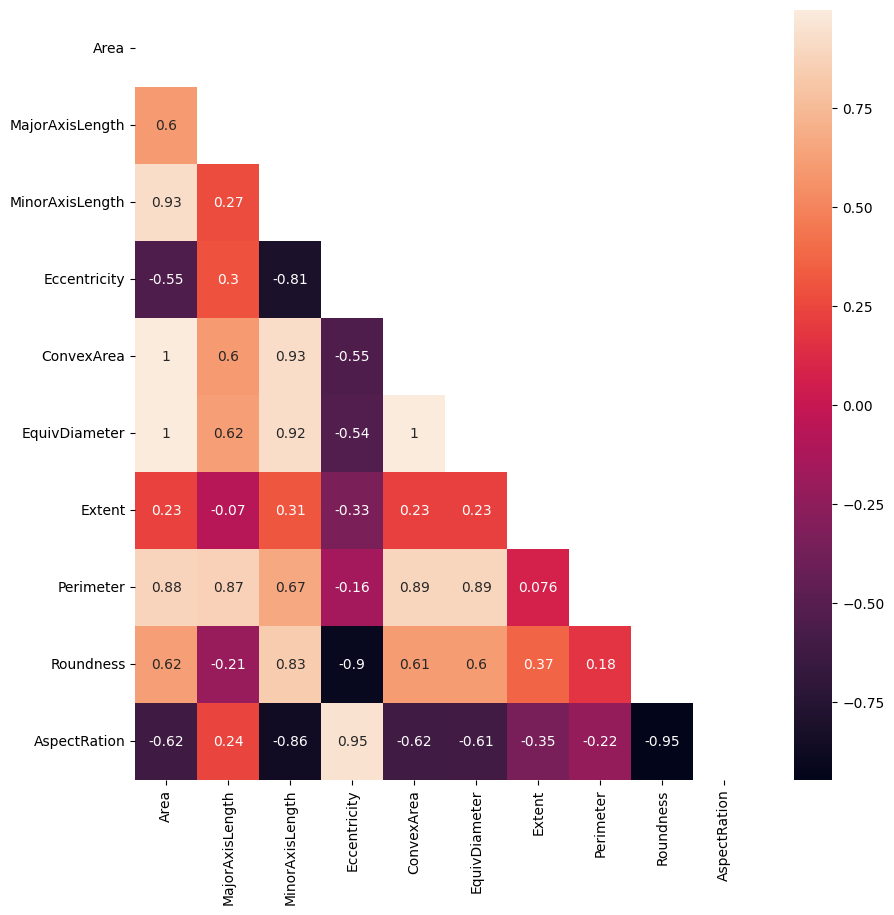

In [33]:
%matplotlib inline
mask = np.triu(np.ones_like(X_train.corr())) 
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(),annot=True,mask=mask)
plt.show()

<Figure size 400x400 with 0 Axes>

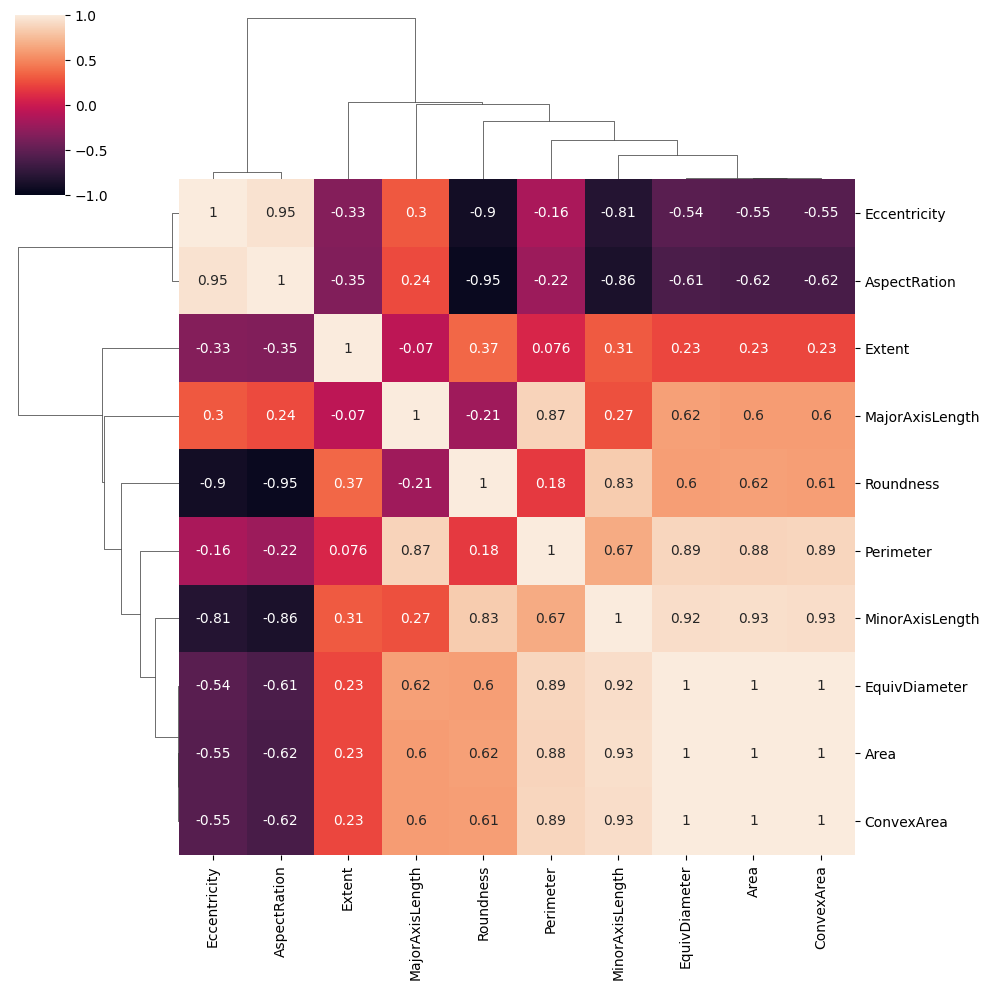

In [34]:
plt.figure(figsize = (4, 4))
clustermap = sns.clustermap(X_train.corr(), vmin = -1, vmax = 1, annot = True)

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]

print(vif_data)

           feature            VIF
0             Area   56606.747799
1  MajorAxisLength   48006.743054
2  MinorAxisLength   30779.928698
3     Eccentricity   15063.660109
4       ConvexArea   44101.243665
5    EquivDiameter  199503.608971
6           Extent      41.308519
7        Perimeter   25025.516633
8        Roundness    8561.919556
9     AspectRation    3542.206442


In [36]:
train_set.to_csv('train_set.csv', index=False)

In [37]:
data.dtypes

Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Perimeter          float64
Roundness          float64
AspectRation       float64
Class                int64
dtype: object

# Standardizing 

In [38]:
predictors = data.drop(columns=['Class'])
response = data['Class']

In [39]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors)
data_en_s = pd.DataFrame(predictors_scaled, columns=predictors.columns, index=data.index)
data_en_s['Class'] = response 

data_en_s

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
723,-1.087486,-1.394592,-0.703234,0.143527,-1.073624,-1.101377,-0.876944,-1.338209,-0.089518,-0.116093,1
1274,-0.735277,-0.733336,-0.601991,0.354381,-0.782324,-0.711175,-0.646604,-1.023625,0.248904,0.123566,1
10672,-0.784518,0.866254,-1.251602,1.358356,-0.755599,-0.764683,-1.890719,0.234644,-1.966128,1.931905,1
1954,-0.847437,-0.651956,-0.705540,0.484566,-0.849136,-0.833533,1.836896,-0.795814,-0.471256,0.288005,1
3239,-1.032774,-0.793606,-0.942527,0.640197,-1.067610,-1.039586,-1.202417,-1.145284,-0.311103,0.504228,1
...,...,...,...,...,...,...,...,...,...,...,...
9372,-0.337247,1.179630,-0.828993,1.164578,-0.330008,-0.290025,-0.626288,0.599080,-1.560197,1.453112,1
7291,-0.443252,0.612268,-0.772673,0.974757,-0.433566,-0.400288,0.001388,0.089942,-1.016701,1.061599,1
17728,2.124111,2.002341,1.393272,-0.231962,2.130005,1.976816,-0.038665,2.208074,0.389545,-0.477830,0
7293,-0.969855,-0.259071,-1.124190,0.975042,-0.996790,-0.969079,-1.489570,-0.749594,-0.861951,1.062139,1


In [40]:
Ys  = data_en_s['Class']
Xs = data_en_s.drop('Class',axis=1)

In [41]:
Xs_train, Xs_test, Ys_train, Ys_test = train_test_split(Xs, Ys, test_size=0.2, random_state=10)

In [42]:
train_set_s = pd.concat([Xs_train,Ys_train],axis=1)
test_set_s = pd.concat([Xs_test,Ys_test],axis=1)

# PCA 

In [43]:
from sklearn.decomposition import PCA
pca = PCA(0.9,random_state=10)
Xtr_pca = pca.fit_transform(Xs_train)
Xte_pca = pca.transform(Xs_test)

In [44]:
Xtr_pca.shape 

(11638, 3)

In [45]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.63716412, 0.26140015, 0.08369003])

In [46]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()

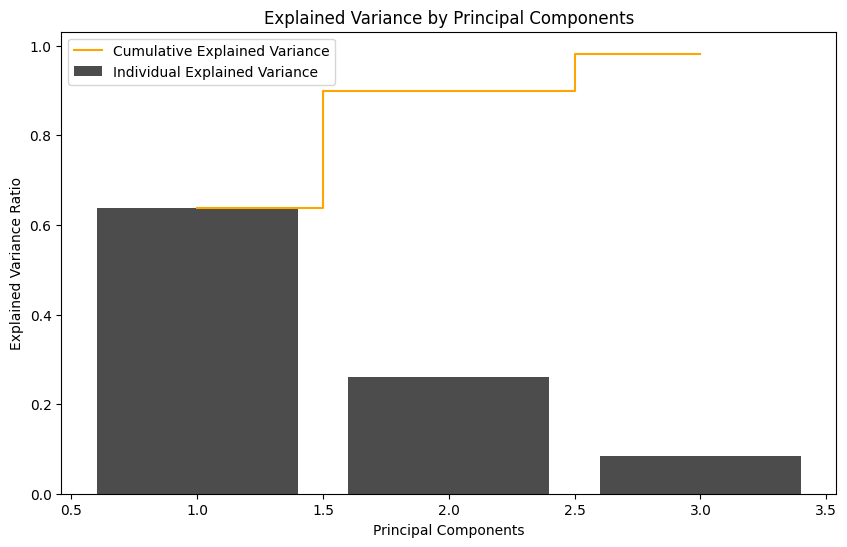

In [47]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='black', label='Individual Explained Variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', color='orange', label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.show()

In [48]:
component_names_tr = [f"PC{i+1}" for i in range(Xtr_pca.shape[1])]
component_names_te = [f"PC{i+1}" for i in range(Xte_pca.shape[1])]

In [49]:
train_pca = pd.DataFrame(Xtr_pca,columns=component_names_tr,index=train_set_s.index)
train_pca['Class'] = Ys_train
train_pca

,PC1,PC2,PC3,Class
10533,4.369289,-0.624838,-1.045825,1
12300,-0.881074,2.699091,1.272412,0
10489,2.852414,-1.894488,-0.099599,1
10276,2.715299,-2.186207,-0.716722,1
9767,2.493758,-2.041011,-0.905961,1
...,...,...,...,...
2958,1.940737,0.255261,0.267007,1
15828,-2.360466,0.250298,0.796793,0
7616,1.399616,-1.461501,1.226485,1
170,2.359265,5.601829,0.466820,1


In [50]:
test_pca = pd.DataFrame(Xte_pca,columns=component_names_te,index=test_set_s.index)
test_pca['Class'] = Ys_test
test_pca

,PC1,PC2,PC3,Class
4418,1.069729,-1.465840,-0.968702,1
16225,-0.714987,1.303356,0.698863,0
9274,3.955383,0.051378,-0.135367,1
2086,0.381108,-1.207395,-0.888258,1
10288,3.510673,-1.358931,-0.689261,1
...,...,...,...,...
8442,1.569666,-2.216210,-0.447780,1
13986,-1.230478,1.075303,-0.765887,0
16605,-0.167638,1.348539,-0.808397,0
10610,1.672053,-2.844222,0.757709,1


# PCA Interpretation

In [51]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, index=Xs_train.columns, columns=[f'PC{i+1}' for i in range(3)])

In [52]:
print("Cross-correlation matrix (Loadings):")
print(loading_matrix)

Cross-correlation matrix (Loadings):
                      PC1       PC2       PC3
Area            -0.963500 -0.252882 -0.017719
MajorAxisLength -0.377312 -0.909738  0.088416
MinorAxisLength -0.989760  0.106751 -0.065051
Eccentricity     0.738065 -0.619047  0.125215
ConvexArea      -0.961751 -0.259122 -0.019015
EquivDiameter   -0.958482 -0.271643 -0.014360
Extent          -0.341014  0.307124  0.887598
Perimeter       -0.740120 -0.650042  0.022142
Roundness       -0.783722  0.570670 -0.077112
AspectRation     0.797797 -0.580419  0.107888


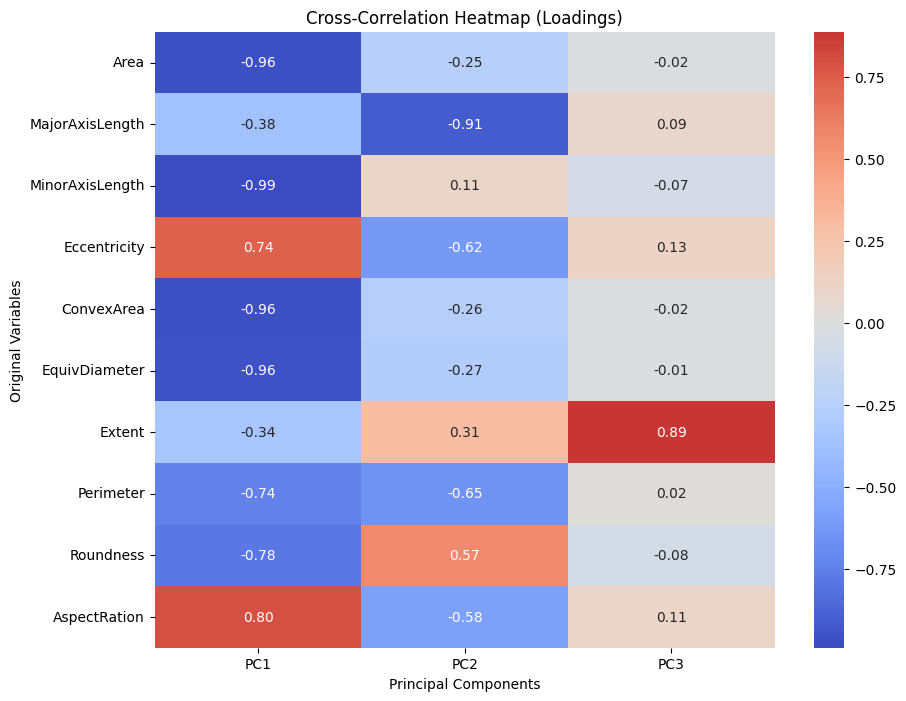

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(loading_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Cross-Correlation Heatmap (Loadings)")
plt.xlabel("Principal Components")
plt.ylabel("Original Variables")
plt.show()

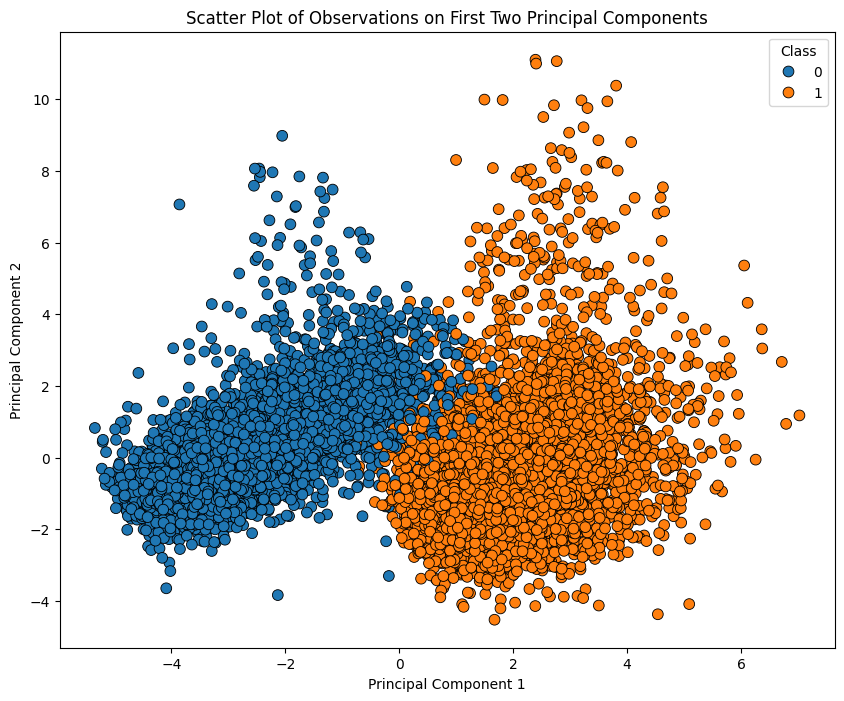

In [54]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=train_pca, palette=['#1f77b4', '#ff7f0e'], s=60, edgecolor='k')

plt.title("Scatter Plot of Observations on First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Class', loc='best')
plt.show()

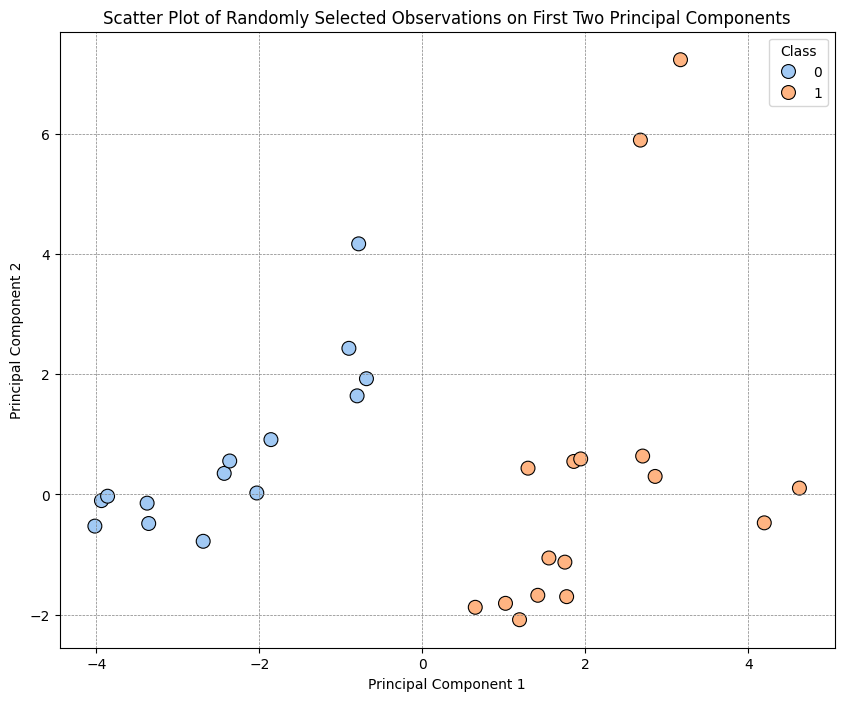

In [55]:
random_sample = train_pca.sample(n=30, random_state=10)

light_palette = sns.color_palette("pastel", n_colors=2)  
plt.figure(figsize=(10, 8))

sns.scatterplot(x='PC1', y='PC2', hue='Class', data=random_sample, palette=light_palette, s=100, edgecolor='k')

plt.grid(visible=True, linestyle='--', linewidth=0.5, color='gray')

plt.title("Scatter Plot of Randomly Selected Observations on First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Class', loc='best')
plt.show()

# Clustering 

In [56]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [57]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=10)
    kmeans.fit(Xtr_pca)
    wcss.append(kmeans.inertia_)

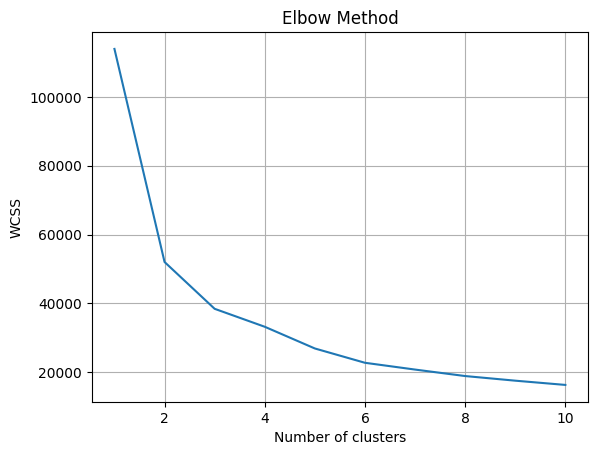

In [58]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [59]:
noise = np.random.normal(0, 0.5, Xtr_pca.shape)  
Xtr_noisy = Xtr_pca + noise

kmeans2 = KMeans(n_clusters=2, random_state=456, n_init=25, algorithm='lloyd')
kmeans2.fit(Xtr_noisy)

zero = []
one = []
for i in kmeans2.labels_:
    if i == 0:
        zero.append(i)
    else:
        one.append(i)


print('\n',
      "Cluster centers:", '\n',
      "Cluster 0 :", kmeans2.cluster_centers_[0],'\n',
       "Cluster 1 :", kmeans2.cluster_centers_[1], '\n','\n',
        "Clustering vector:" ,'\n', kmeans2.labels_, '\n','\n',
         "Total Within Cluster Sum of Squares : ", '\n',
         kmeans2.inertia_ , '\n',
          "Observation numbers :", '\n',
          "Cluster 0 :", len(zero), '\n',
          "Cluster 1 :", len(one))


 Cluster centers: 
 Cluster 0 : [ 1.96364647 -0.21277681  0.05375193] 
 Cluster 1 : [-2.68802516  0.28825069 -0.06667435] 
 
 Clustering vector: 
 [0 1 0 ... 0 0 0] 
 
 Total Within Cluster Sum of Squares :  
 60259.616065696035 
 Observation numbers : 
 Cluster 0 : 6720 
 Cluster 1 : 4918


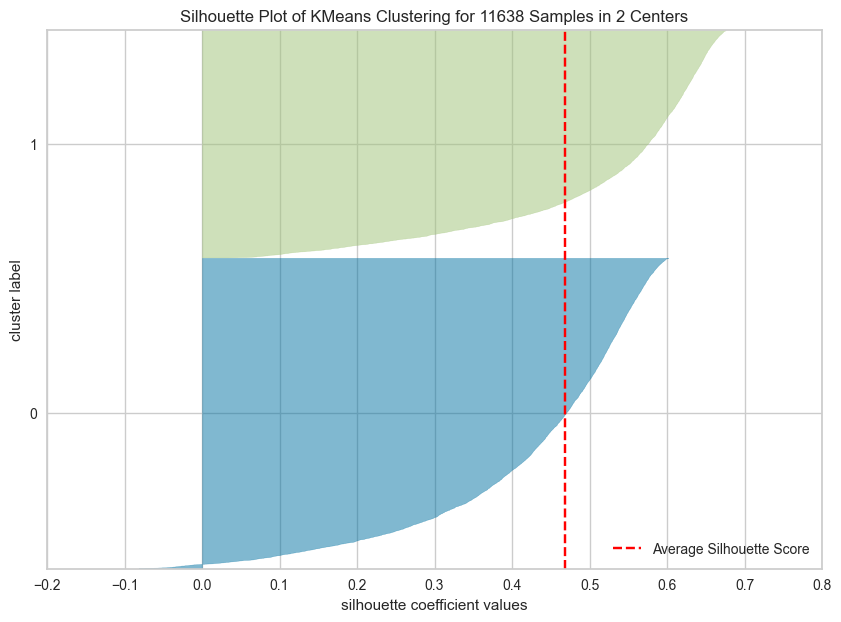

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 11638 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=2, n_init=25,
                                      random_state=456))

In [60]:
from yellowbrick.cluster import silhouette_visualizer
plt.figure(figsize=(10,7))
silhouette_visualizer(kmeans2, Xtr_noisy, colors='yellowbrick')

# Logistic Regression 

In [61]:
logi_model = LogisticRegression(penalty='l2',solver='liblinear',random_state = 10,multi_class='ovr')

In [62]:
param_grid_logi = {'solver': ['lbfgs', 'newton-cg','sag','saga'],'penalty':['None','l2','l1']}

In [63]:
grid_search_logi = GridSearchCV(estimator=logi_model, param_grid=param_grid_logi, cv=5, scoring='accuracy')

In [64]:
grid_search_logi.fit(Xtr_pca,Ys_train)

C:\Users\Ganeshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


35 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ganeshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ganeshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Ganeshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklear

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='ovr', random_state=10,
                                          solver='liblinear'),
             param_grid={'penalty': ['None', 'l2', 'l1'],
                         'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']},
             scoring='accuracy')

In [65]:
best_params_logi = grid_search_logi.best_params_
best_params_logi

{'penalty': 'l2', 'solver': 'lbfgs'}

In [66]:
best_logi_model = grid_search_logi.best_estimator_
best_logi_model

LogisticRegression(multi_class='ovr', random_state=10)

In [67]:
y_pred_logi = best_logi_model.predict(Xte_pca)

In [68]:
Accuracy_logi= accuracy_score(Ys_test, y_pred_logi)
Accuracy_logi

0.9869415807560138

In [69]:
y_train_pred_logi = best_logi_model.predict(Xtr_pca)
Accuracy_train_logi = accuracy_score(Ys_train, y_train_pred_logi)
print("Training Set Accuracy:", Accuracy_train_logi)

Training Set Accuracy: 0.986681560405568


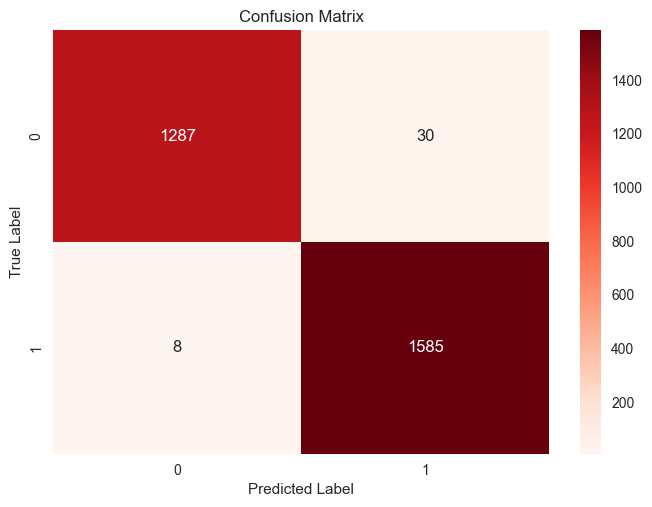

In [70]:
class_labels = ['0', '1']
conf_matrix_logi = confusion_matrix(Ys_test, y_pred_logi)
sns.heatmap(conf_matrix_logi, annot=True, fmt='d', cmap='Reds', 
            xticklabels=class_labels, 
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [71]:
print(f"Classification Report for Training Set:\n{classification_report(Ys_train, y_train_pred_logi,digits=4)}\n\nClassification Report for Test Set:\n{classification_report(Ys_test, y_pred_logi,digits=4)}")

Classification Report for Training Set:
              precision    recall  f1-score   support

           0     0.9893    0.9808    0.9850      5200
           1     0.9846    0.9915    0.9880      6438

    accuracy                         0.9867     11638
   macro avg     0.9870    0.9861    0.9865     11638
weighted avg     0.9867    0.9867    0.9867     11638


Classification Report for Test Set:
              precision    recall  f1-score   support

           0     0.9938    0.9772    0.9855      1317
           1     0.9814    0.9950    0.9882      1593

    accuracy                         0.9869      2910
   macro avg     0.9876    0.9861    0.9868      2910
weighted avg     0.9870    0.9869    0.9869      2910



# XG Boost 

In [72]:
xgb_model = xgb.XGBClassifier(random_state=10,booster='dart',alpha=5,gamma=1,sample_type='uniform',normalize_type='forest',rate_drop=0.1)

In [73]:
param_grid_xgb = {'learning_rate': [0.05, 0.1] ,'max_depth': [2, 3],'n_estimators': [50, 100],'lambda':[2.5,3],'subsample': [0.7, 0.8],'colsample_bytree': [0.7, 0.8]}

In [74]:
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='neg_log_loss',n_jobs=-1)

In [75]:
grid_search_xgb.fit(Xtr_pca ,Ys_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(alpha=5, base_score=None, booster='dart',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=1, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     normalize_type='forest',
                                     num_parallel_tree=None, predictor=None,
                                     random_state=10, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8], 'lambda': [2.5, 3],
                         'learning_rate': [0.05, 0.1], 'max_depth': [2, 3],
                         'n_estimators': [50, 100], 'subsample': [0.7, 0.8]},
             scoring='neg_log_loss')

In [76]:
best_params_xgb = grid_search_xgb.best_params_
best_params_xgb

{'colsample_bytree': 0.7,
 'lambda': 2.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.8}

In [77]:
best_xgb_model = grid_search_xgb.best_estimator_
best_xgb_model

XGBClassifier(alpha=5, base_score=0.5, booster='dart', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', lambda=2.5,
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, normalize_type='forest', num_parallel_tree=1,
              predictor='auto', ...)

In [78]:
y_pred_xgb = best_xgb_model.predict(Xte_pca)

In [79]:
Accuracy_xgb = accuracy_score(Ys_test, y_pred_xgb)
Accuracy_xgb

0.9876288659793815

In [80]:
y_train_pred_xgb = best_xgb_model.predict(Xtr_pca)
Accuracy_train_xgb = accuracy_score(Ys_train, y_train_pred_xgb)
print("Training Set Accuracy:", Accuracy_train_xgb)

Training Set Accuracy: 0.9902045024918371


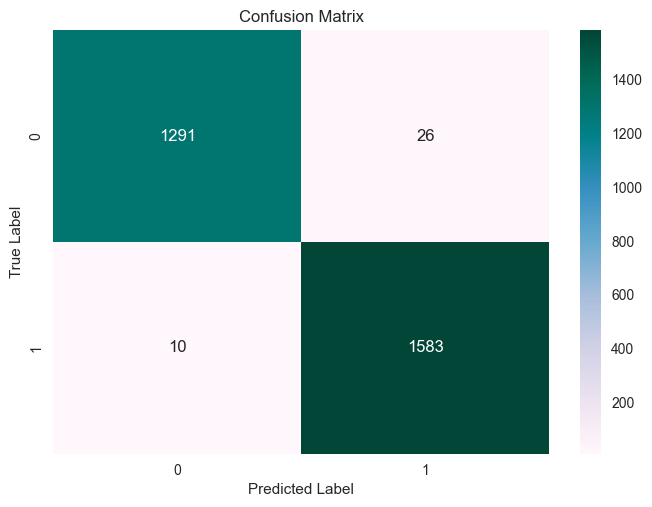

In [81]:
class_labels = ['0', '1']
conf_matrix_logi = confusion_matrix(Ys_test, y_pred_xgb)
sns.heatmap(conf_matrix_logi, annot=True, fmt='d', cmap='PuBuGn', 
            xticklabels=class_labels, 
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [82]:
print(f"Classification Report for Training Set:\n{classification_report(Ys_train, y_train_pred_xgb,digits=4)}\n\nClassification Report for Test Set:\n{classification_report(Ys_test, y_pred_xgb,digits=4)}")

Classification Report for Training Set:
              precision    recall  f1-score   support

           0     0.9921    0.9860    0.9890      5200
           1     0.9887    0.9936    0.9912      6438

    accuracy                         0.9902     11638
   macro avg     0.9904    0.9898    0.9901     11638
weighted avg     0.9902    0.9902    0.9902     11638


Classification Report for Test Set:
              precision    recall  f1-score   support

           0     0.9923    0.9803    0.9862      1317
           1     0.9838    0.9937    0.9888      1593

    accuracy                         0.9876      2910
   macro avg     0.9881    0.9870    0.9875      2910
weighted avg     0.9877    0.9876    0.9876      2910



# Random Forest 

In [83]:
rf_model = RandomForestClassifier(random_state=10)

In [84]:
param_grid_rf = {'criterion': ['gini','entropy'] ,'n_estimators': [25,35,45],'max_depth': [2,3,4]} 

In [85]:
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy')

In [86]:
grid_search_rf.fit(Xtr_pca ,Ys_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4], 'n_estimators': [25, 35, 45]},
             scoring='accuracy')

In [87]:
best_params_rf = grid_search_rf.best_params_
best_params_rf

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 35}

In [88]:
best_rf_model = grid_search_rf.best_estimator_
best_rf_model

RandomForestClassifier(max_depth=4, n_estimators=35, random_state=10)

In [89]:
y_pred_rf = best_rf_model.predict(Xte_pca)
Accuracy_rf = accuracy_score(Ys_test, y_pred_rf)
Accuracy_rf

0.9831615120274914

In [90]:
y_train_pred_rf = best_rf_model.predict(Xtr_pca)
Accuracy_train_rf = accuracy_score(Ys_train, y_train_pred_rf)
print("Training Set Accuracy:", Accuracy_train_rf)

Training Set Accuracy: 0.9849630520708026


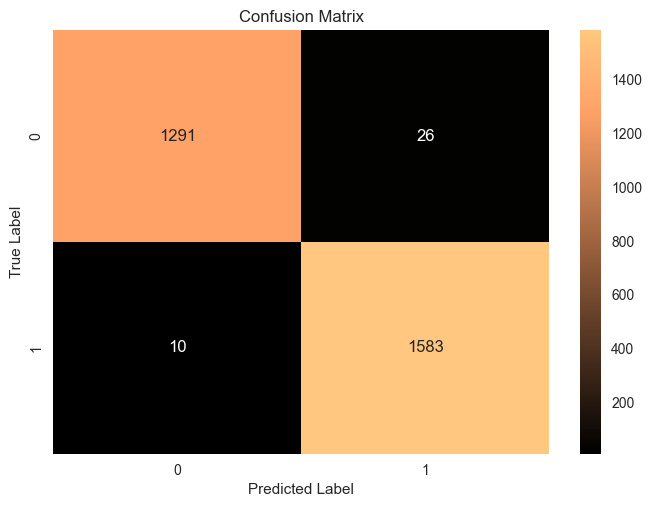

In [91]:
class_labels = ['0', '1']
conf_matrix_rf = confusion_matrix(Ys_test, y_pred_rf)
sns.heatmap(conf_matrix_logi, annot=True, fmt='d', cmap='copper', 
            xticklabels=class_labels, 
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [92]:
print(f"Classification Report for Training Set:\n{classification_report(Ys_train, y_train_pred_rf,digits=4)}\n\nClassification Report for Test Set:\n{classification_report(Ys_test, y_pred_rf,digits=4)}")

Classification Report for Training Set:
              precision    recall  f1-score   support

           0     0.9931    0.9731    0.9830      5200
           1     0.9786    0.9946    0.9865      6438

    accuracy                         0.9850     11638
   macro avg     0.9859    0.9838    0.9848     11638
weighted avg     0.9851    0.9850    0.9849     11638


Classification Report for Test Set:
              precision    recall  f1-score   support

           0     0.9922    0.9704    0.9812      1317
           1     0.9760    0.9937    0.9848      1593

    accuracy                         0.9832      2910
   macro avg     0.9841    0.9821    0.9830      2910
weighted avg     0.9833    0.9832    0.9831      2910



# SVM 

## Kernal = Polynomial

In [93]:
param_grid_svm_K = {'C': [1,1.5,2,2.5,3,3.5],'gamma':['scale','auto',0.01,0.1],'decision_function_shape':['ovo','ovr']} 

In [94]:
svm_polyK_model = SVC(random_state=10,probability=True,kernel='poly')

In [95]:
grid_search_svm_polyK = GridSearchCV(estimator=svm_polyK_model , param_grid=param_grid_svm_K, scoring='accuracy', cv=3, n_jobs=-1)

In [96]:
grid_search_svm_polyK.fit(Xtr_pca,Ys_train)

GridSearchCV(cv=3,
             estimator=SVC(kernel='poly', probability=True, random_state=10),
             n_jobs=-1,
             param_grid={'C': [1, 1.5, 2, 2.5, 3, 3.5],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto', 0.01, 0.1]},
             scoring='accuracy')

In [97]:
best_svm_polyK_model = grid_search_svm_polyK.best_estimator_
best_svm_polyK_model

SVC(C=3, decision_function_shape='ovo', gamma='auto', kernel='poly',
    probability=True, random_state=10)

In [98]:
y_pred_svm_polyK = best_svm_polyK_model.predict(Xte_pca)

In [99]:
Accuracy_svm_polyK= accuracy_score(Ys_test, y_pred_svm_polyK)
Accuracy_svm_polyK

0.9862542955326461

In [100]:
y_pred_svm_polyK_train = best_svm_polyK_model.predict(Xtr_pca)
Accuracy_svm_polyK_train = accuracy_score(Ys_train, y_pred_svm_polyK_train)
Accuracy_svm_polyK_train

0.9865956349888297

## Kernal = RBF

In [101]:
svm_rbfK_model = SVC(random_state=10,probability=True,kernel='rbf')

In [102]:
grid_search_svm_rbfK = GridSearchCV(estimator=svm_rbfK_model , param_grid=param_grid_svm_K, scoring='accuracy', cv=5, n_jobs=-1)

In [103]:
grid_search_svm_rbfK.fit(Xtr_pca,Ys_train)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=10), n_jobs=-1,
             param_grid={'C': [1, 1.5, 2, 2.5, 3, 3.5],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto', 0.01, 0.1]},
             scoring='accuracy')

In [104]:
best_svm_rbfK_model = grid_search_svm_rbfK.best_estimator_
best_svm_rbfK_model

SVC(C=3.5, decision_function_shape='ovo', gamma='auto', probability=True,
    random_state=10)

In [105]:
y_pred_svm_rbfK = best_svm_rbfK_model.predict(Xte_pca)
Accuracy_svm_rbfK= accuracy_score(Ys_test, y_pred_svm_rbfK)
Accuracy_svm_rbfK

0.9903780068728523

In [106]:
y_pred_svm_rbfK_train = best_svm_rbfK_model.predict(Xtr_pca)
Accuracy_svm_rbfK_train = accuracy_score(Ys_train, y_pred_svm_rbfK_train)
Accuracy_svm_rbfK_train

0.9905482041587902

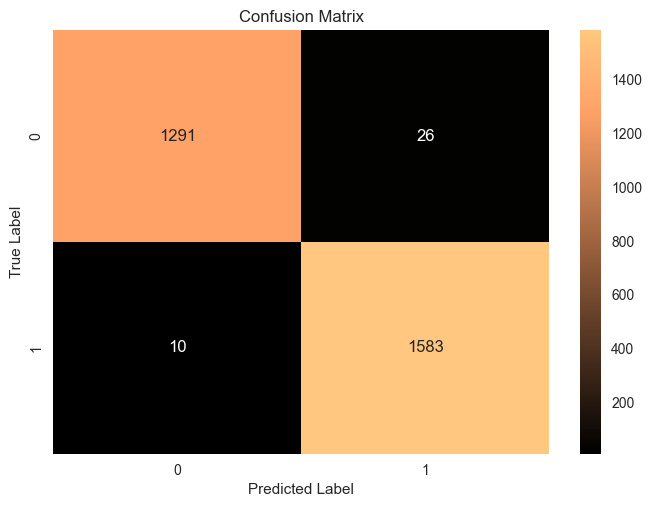

In [107]:
class_labels = ['0', '1']
conf_matrix_rf = confusion_matrix(Ys_test, y_pred_svm_rbfK)
sns.heatmap(conf_matrix_logi, annot=True, fmt='d', cmap='copper', 
            xticklabels=class_labels, 
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [108]:
print(f"Classification Report for Training Set:\n{classification_report(Ys_train, y_pred_svm_rbfK_train,digits=4)}\n\nClassification Report for Test Set:\n{classification_report(Ys_test, y_pred_svm_rbfK,digits=4)}")

Classification Report for Training Set:
              precision    recall  f1-score   support

           0     0.9926    0.9862    0.9894      5200
           1     0.9889    0.9941    0.9915      6438

    accuracy                         0.9905     11638
   macro avg     0.9908    0.9901    0.9904     11638
weighted avg     0.9906    0.9905    0.9905     11638


Classification Report for Test Set:
              precision    recall  f1-score   support

           0     0.9931    0.9856    0.9893      1317
           1     0.9881    0.9944    0.9912      1593

    accuracy                         0.9904      2910
   macro avg     0.9906    0.9900    0.9903      2910
weighted avg     0.9904    0.9904    0.9904      2910



## Kernal = Sigmoid

In [109]:
svm_sigK_model = SVC(random_state=10,probability=True,kernel='sigmoid')

In [110]:
grid_search_svm_sigK = GridSearchCV(estimator=svm_sigK_model , param_grid=param_grid_svm_K, scoring='accuracy', cv=5, n_jobs=-1)

In [111]:
grid_search_svm_sigK.fit(Xtr_pca,Ys_train)

GridSearchCV(cv=5,
             estimator=SVC(kernel='sigmoid', probability=True, random_state=10),
             n_jobs=-1,
             param_grid={'C': [1, 1.5, 2, 2.5, 3, 3.5],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto', 0.01, 0.1]},
             scoring='accuracy')

In [112]:
best_svm_sigK_model = grid_search_svm_sigK.best_estimator_
best_svm_sigK_model

SVC(C=1, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid',
    probability=True, random_state=10)

In [113]:
y_pred_svm_sigK = best_svm_sigK_model.predict(Xte_pca)
Accuracy_svm_sigK= accuracy_score(Ys_test, y_pred_svm_sigK)
Accuracy_svm_sigK

0.9783505154639175

In [114]:
y_pred_svm_sigK_train = best_svm_sigK_model.predict(Xtr_pca)
Accuracy_svm_sigK_train = accuracy_score(Ys_train, y_pred_svm_sigK_train)
Accuracy_svm_sigK_train

0.9774875408145729

## Kernal = linear

In [115]:
svm_lK_model = SVC(random_state=10,probability=True,kernel='linear')

In [116]:
grid_search_svm_lK = GridSearchCV(estimator=svm_lK_model , param_grid=param_grid_svm_K, scoring='accuracy', cv=5, n_jobs=-1)

In [117]:
grid_search_svm_lK.fit(Xtr_pca,Ys_train)

GridSearchCV(cv=5,
             estimator=SVC(kernel='linear', probability=True, random_state=10),
             n_jobs=-1,
             param_grid={'C': [1, 1.5, 2, 2.5, 3, 3.5],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto', 0.01, 0.1]},
             scoring='accuracy')

In [118]:
best_svm_lK_model = grid_search_svm_lK.best_estimator_
best_svm_lK_model

SVC(C=1, decision_function_shape='ovo', kernel='linear', probability=True,
    random_state=10)

In [119]:
y_pred_svm_lK = best_svm_lK_model.predict(Xte_pca)
Accuracy_svm_lK= accuracy_score(Ys_test, y_pred_svm_lK)
Accuracy_svm_lK

0.98659793814433

In [120]:
y_pred_svm_lK_train = best_svm_lK_model.predict(Xtr_pca)
Accuracy_svm_lK_train = accuracy_score(Ys_train, y_pred_svm_lK_train)
Accuracy_svm_lK_train

0.9868534112390445

C:\Users\Ganeshi\AppData\Local\Temp\ipykernel_28364\3514996497.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



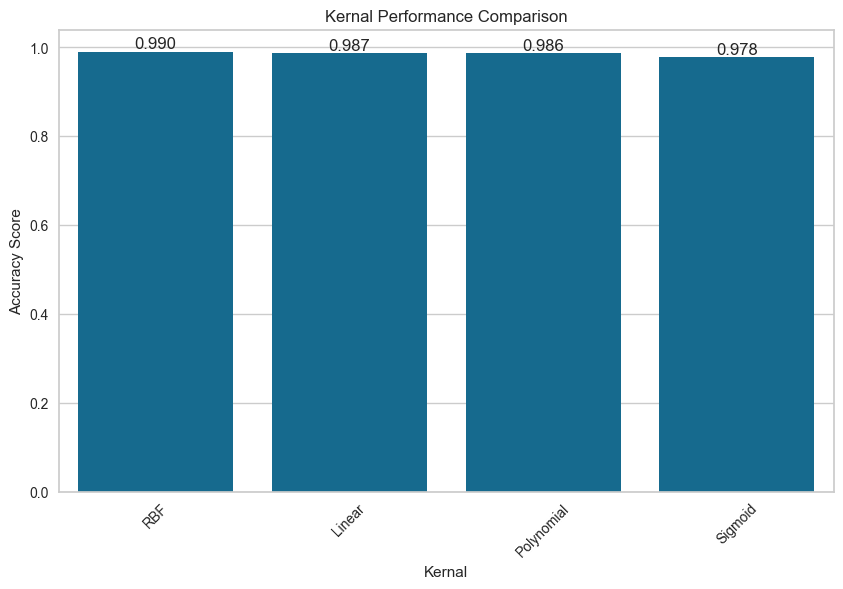

In [121]:
result_svm = pd.DataFrame({
    'Kernal': ['Linear', 'Polynomial','RBF','Sigmoid'],
    'Score': [Accuracy_svm_lK, Accuracy_svm_polyK,Accuracy_svm_rbfK,Accuracy_svm_sigK]
})
result_svm

result_svm.sort_values(by='Score', ascending=False, inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

sns.barplot(x='Kernal', y='Score', data=result_svm, ax=ax)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result_svm.Kernal, rotation=45)
plt.title('Kernal Performance Comparison')
plt.ylabel('Accuracy Score')
plt.show()

# Model Performance Comparisson

In [122]:
result = pd.DataFrame({
    'Algorithm': ['RandomForestClassifier', 'LogisticRegression','XGBoostClassifier','SVM'],
    'Score': [Accuracy_rf,Accuracy_logi,Accuracy_xgb,Accuracy_svm_rbfK]
})
result

,Algorithm,Score
0,RandomForestClassifier,0.983162
1,LogisticRegression,0.986942
2,XGBoostClassifier,0.987629
3,SVM,0.990378


C:\Users\Ganeshi\AppData\Local\Temp\ipykernel_28364\4228487955.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



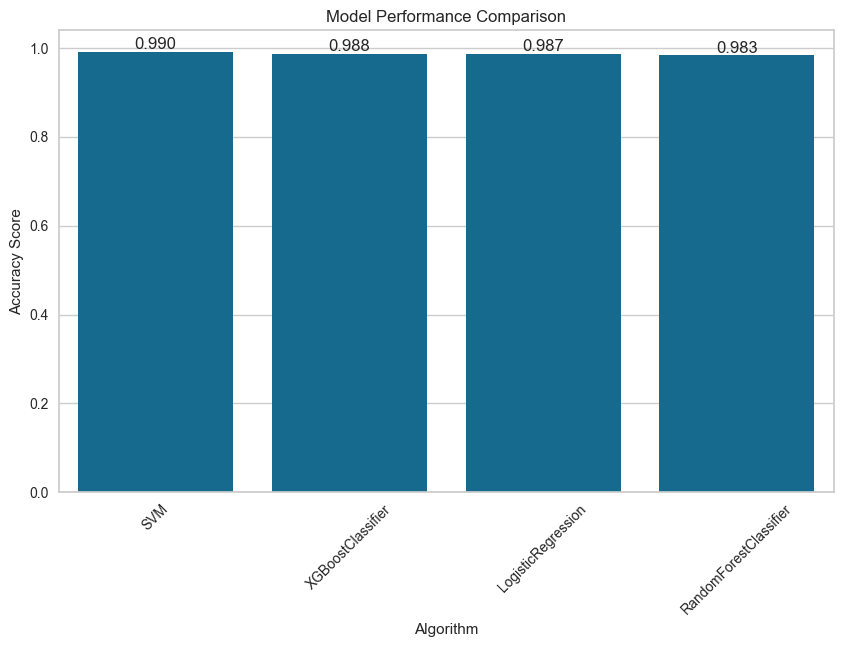

In [123]:
result.sort_values(by='Score', ascending=False, inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

sns.barplot(x='Algorithm', y='Score', data=result, ax=ax)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm, rotation=45)
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy Score')
plt.show()

## Make Pickel files

In [125]:
import os
import pickle
import joblib

In [126]:
# Define the original file path
file_name = r'E:\FourthYear\ST 4052 - Statistical Learning II\Final\App\scalerN.pkl'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(file_name), exist_ok=True)

# Save the model
with open(file_name, 'wb') as f:
    pickle.dump(scaler, f)

print("Model saved successfully at:", file_name)

Model saved successfully at: E:\FourthYear\ST 4052 - Statistical Learning II\Final\App\scalerN.pkl


In [127]:
# Define the original file path
file_name = r'E:\FourthYear\ST 4052 - Statistical Learning II\Final\App\pcaN.pkl'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(file_name), exist_ok=True)

# Save the model
with open(file_name, 'wb') as f:
    pickle.dump(pca, f)

print("Model saved successfully at:", file_name)

Model saved successfully at: E:\FourthYear\ST 4052 - Statistical Learning II\Final\App\pcaN.pkl


In [128]:
# Define the original file path
file_name = r'E:\FourthYear\ST 4052 - Statistical Learning II\Final\App\classifierN.pkl'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(file_name), exist_ok=True)

# Save the model
with open(file_name, 'wb') as f:
    pickle.dump(best_svm_rbfK_model, f)

print("Model saved successfully at:", file_name)

Model saved successfully at: E:\FourthYear\ST 4052 - Statistical Learning II\Final\App\classifierN.pkl
